In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
x = np.random.randint(60,300,size=240)
X_1 = []   
for i in range(len(x)):
    X_1.append(math.radians(x[i]))   

In [9]:
K = np.random.normal(loc=0.0, scale=0.15)  
output = []
for i in range(len(X_1)):
    output.append(math.sin(X_1[i]) + K)

In [10]:
DataSet = []

for i in range(len(x)):
    DataSet.append([X_1[i],output[i]])  

DataSet = np.array(DataSet)
np.random.shuffle(DataSet)

In [12]:
def grad_des(x, y, alpha, epochs):
    
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    w = 2*np.random.rand(n+1,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient
        loss_history.append(cost)
    return loss_history, w

<function matplotlib.pyplot.show(close=None, block=None)>

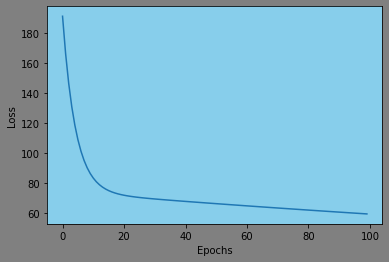

In [18]:
loss, w = grad_des(DataSet[:,:-1],DataSet[:,-1], 0.01, 100)

plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("skyblue")
plt.plot(np.arange(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show

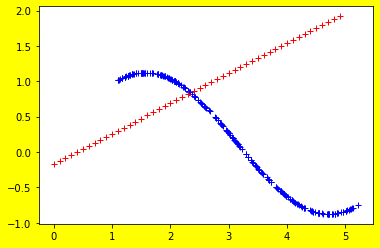

In [132]:
plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor('white')
for i in range(len(DataSet)):
        plt.plot(DataSet[i,0], DataSet[i,1], 'b+')
for i in range(50):
        plt.plot(i/10, w[1] * i/10 + w[0], 'r+')
plt.show()

In [148]:
def grad_des_n(x, y, alpha, epochs,k):
    
    temp = x
    x = np.concatenate((np.power(x,0),x), axis=1)
    for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
        
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    w = 2*np.random.rand(n,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient/(np.linalg.norm(gradient))
        loss_history.append(cost)
    return loss_history, w

In [149]:
def plot_n(DataSet,w,k):
    plt.figure(facecolor='yellow')
    ax = plt.axes()
    ax.set_facecolor('white')
    for i in range(len(DataSet)):
            plt.plot(DataSet[i,0], DataSet[i,1], 'b+')

    
    for i in range(100,500):
        data = w[0]
        for j in range(1,k+1):
            data += (w[j] * (i/100)**j)
        plt.plot(i/100, data, 'r+')
    plt.show()

1337.9394892542505 [ 0.35971619 -0.6135631  -0.55358155  0.15284656]


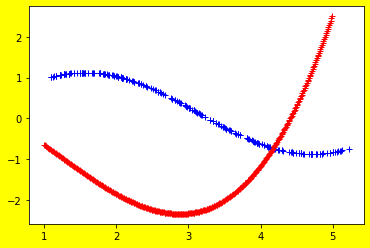

In [157]:
loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,3)
print(loss[-1], w)
plot_n(DataSet,w,3)

1318093.3003560365 [-0.84400903  0.51167098  0.99259127  0.98674655 -0.20550232  0.48694581
 -0.10764871]


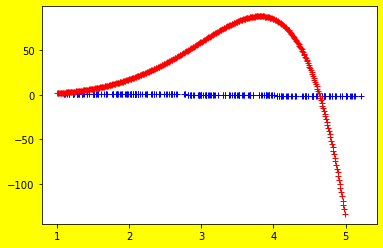

5100283659.949696 [-0.71020598 -0.85505961  0.1868206  -0.21207463 -0.85294415  0.88267184
 -0.80614371 -0.09308286 -0.4746422   0.11512712]


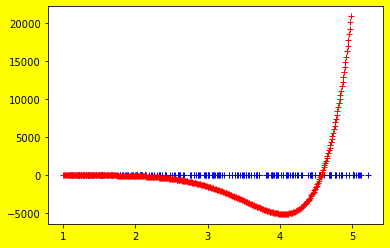

212009839313669.7 [-0.65110342  0.24593378 -0.26399491 -0.22962539 -0.34358074 -0.20500843
 -0.95088509 -0.50707341  0.34824173  0.55046278  0.3397539   0.82444207
 -0.18641396]


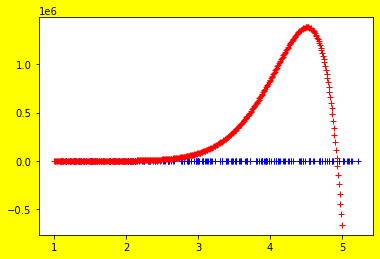

9.507770205762506e+17 [ 0.18624163 -0.49248396 -0.18914065 -0.70003072 -0.56046084  0.7670095
 -0.32606199 -0.3758342  -0.76156373  0.67774341  0.46278149  0.59156019
 -0.72553867  0.81571688  0.39696806 -0.11252214]


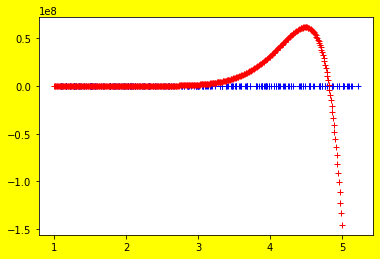

In [158]:
loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,6)
print(loss[-1], w)
plot_n(DataSet,w,6)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,9)
print(loss[-1], w)
plot_n(DataSet,w,9)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,12)
print(loss[-1], w)
plot_n(DataSet,w,12)

loss, w = grad_des_n(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15)
print(loss[-1], w)
plot_n(DataSet,w,15)

In [159]:
def grad_des_n_l1(x, y, alpha, epochs,k, l):
    
    temp = x
    x = np.concatenate((np.power(x,0),x), axis=1)
    for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
        
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    w = 2*np.random.rand(n,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * (gradient/(np.linalg.norm(gradient)) + l*w*w)
        loss_history.append(cost)
    return loss_history, w

In [164]:
def grad_des_n_l2(x, y, alpha, epochs,k, l):
    
    temp = x
    x = np.concatenate((np.power(x,0),x), axis=1)
    for i in range(1,k):
        x = np.concatenate((x,np.power(temp,i+1)), axis=1)
        
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    w = 2*np.random.rand(n,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * (gradient/(np.linalg.norm(gradient)) + l*w*w)
        loss_history.append(cost)
    return loss_history, w

6.753712800679054e+17 [-0.97810536  0.99746236 -0.93296414  0.47909222 -0.22664976  0.57555188
  0.47217485  0.89595154  0.05906321 -0.85540024  0.50789426  0.31948319
 -0.67364764  0.24147    -0.61406756  0.12403345]


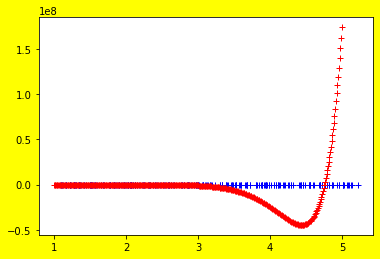

2.6347289172690273e+18 [ 0.39007422 -0.18967936  0.82391967  0.69217752  0.1062776   0.64628989
 -0.95791545  0.23765954 -0.57553954 -0.51330279  0.3554323  -0.93661297
  0.20917246 -0.00780056 -0.94637088  0.18729415]


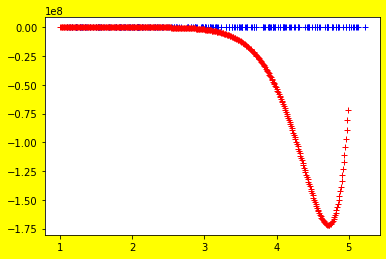

3.3155943224939296e+17 [ 0.38838063  0.33179538 -0.45100848  0.94116951 -0.33460795 -0.32532087
  0.47937809  0.39034569  0.87326521  0.63364617 -0.67608585  0.46702505
 -0.34230673 -0.18826512  0.43482794 -0.07003136]


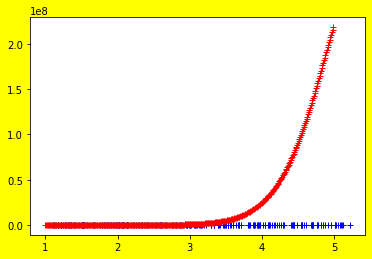

1.3109670068350254e+18 [ 0.92322968 -0.90684357  0.44679687  0.79159145  0.40172664 -0.68923633
  0.37415563  0.81280572 -0.73186301  0.84568929  0.40762218 -0.67712564
  0.73117432  0.49716027 -0.1090655  -0.00550578]


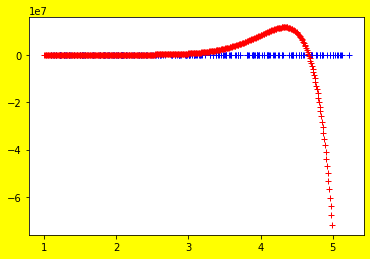

6.923374928799782e+19 [  0.27901582  -0.10413755  -0.55023023 -19.67235289  -2.07680862
  -0.40935456   0.44625069  -0.2399362    0.11270356  -0.12685419
   0.10461098  -4.48137703   0.08024814  -0.12591203  -2.84349066
   0.51804638]


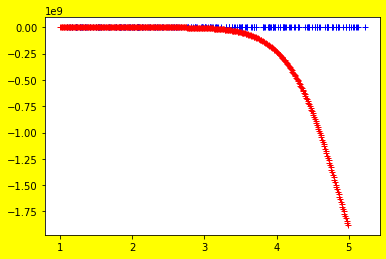

In [161]:
l = [1e-10,1e-8,1e-4,1e-2,1,10,20]
loss, w = grad_des_n_l1(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[0])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l1(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[1])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l1(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[2])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l1(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[3])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l1(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[4])
print(loss[-1], w)
plot_n(DataSet,w,15)

1.3799980095710172e+18 [ 0.60451447  0.06201835 -0.31948919  0.33201678 -0.92354706 -0.11451455
 -0.44112743  0.5210596  -0.36797282 -0.91049185 -0.2221007  -0.78490962
 -0.78710826 -0.85977597 -0.37114554  0.12088783]


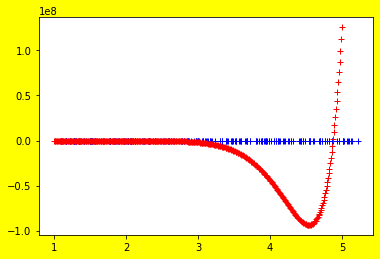

9.943070821489055e+17 [-0.9060762  -0.62044528 -0.33092761  0.40625978 -0.77910575 -0.11285251
  0.63054567  0.13637126  0.04016987 -0.01783712  0.22072812 -0.63570436
 -0.39288625  0.1956347  -0.14949957  0.02257036]


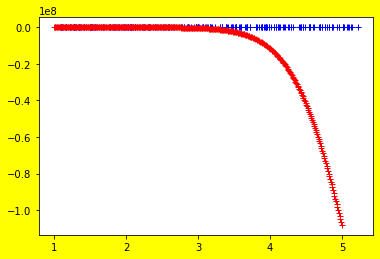

1.96380591854803e+18 [ 5.29506985e-01  3.42189437e-01  1.12950310e-01 -8.37722016e-01
  7.71177308e-01  9.58157319e-01  1.46527944e-01 -3.47298144e-01
  2.92940175e-01  3.31153125e-01 -5.82776447e-01 -7.66725072e-01
 -4.74139150e-04 -7.62175400e-01  1.97701551e-01 -6.92328967e-03]


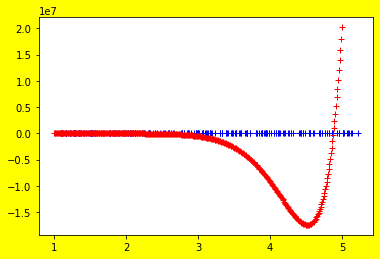

1.1881278322058914e+17 [-0.81259652 -0.00286444 -0.65713738  0.00318912  0.98201057  0.59334694
 -0.99018161  0.01070822 -0.87513952  0.52517138  0.90128904  0.69283344
  0.2053476   0.55185444  0.02223529 -0.02013525]


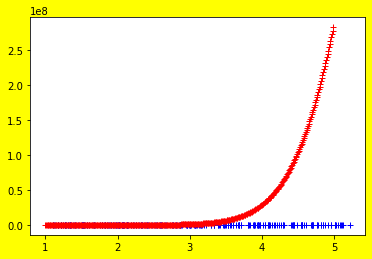

1.4019458070872044e+18 [ 0.37842847  0.2940784   0.15956393 -0.02352917  0.2129185  -0.514312
  0.42716291 -0.43225201 -0.49102398  0.10641448 -0.26332553 -0.5710963
  0.32742355  0.48604179 -0.10958255  0.00297846]


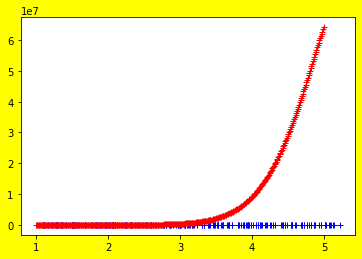

In [165]:
l = [1e-10,1e-8,1e-4,1e-2,1,10,20]
loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[0])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[1])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[2])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[3])
print(loss[-1], w)
plot_n(DataSet,w,15)

loss, w = grad_des_n_l2(DataSet[:,:-1],DataSet[:,-1], 0.01, 100,15,l[4])
print(loss[-1], w)
plot_n(DataSet,w,15)